In [1]:
# Random Library Imports
import subprocess,os,glob,tempfile,re,webbrowser,io,sys,types,urllib,\
time

# Importing Datetime Libraries
from datetime import datetime, date

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Proj 

# Numerical and Scientific Libraries
import numpy as np
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter

# Accessing Data from External Databases via XLM Catalog
from siphon.ncss import NCSS
from siphon.catalog import TDSCatalog

# MetPy Libraries
import metpy
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import ctables
from metpy.plots import add_metpy_logo
from metpy.plots.ctables import registry
from metpy.plots import add_timestamp

# NetCDF Libraries
from netCDF4 import Dataset
from netCDF4 import num2date

# More Image Manipulation Options
import PIL
from PIL import Image as PILImage

# Ipyhton Options
from IPython import get_ipython
from nbformat import current
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML, display, Image

# Matplotlib Plotting Libraries
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm, Normalize
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patheffects

import ipywidgets as widgets


/Users/chowdahead/miniconda3/lib/python3.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
# Set the date you want to convert
dt = datetime(2019, 7, 12)
dt = datetime.utcnow()

# Start of year for reference
d0 = datetime(2019, 1, 1)

# Find the difference and add one to get the day number of the calander year
delta = dt - d0
Julian_Day = delta.days+1
if Julian_Day < 100:
    Julian_Day = "0"+str(Julian_Day)
    if int(Julian_Day) < 10:
        Julian_Day = "0"+str(Julian_Day)

Year = str('{0:%Y}'.format(dt))
Month = str('{0:%m}'.format(dt))
Day = str('{0:%d}'.format(dt))
Hour = str('{0:%H}'.format(dt))
Minute = str('{0:%m}'.format(dt))

#'{0:%Y}'.format(dt)+"-"+'{0:%m}'.format(dt)+"-"+'{0:%d}'.format(dt)+"-"+'{0:%H}'.format(dt)
print("date: ",Year+"-"+Month+"-"+Day+"-"+Hour+"-"+Minute)

# Julian day (Day)
print("Julian number: ",Julian_Day)

date:  2019-08-05-16-08
Julian number:  217


In [3]:
cd /Users/chowdahead/Downloads/GOES_Data/

/Users/chowdahead/Downloads/GOES_Data


In [ ]:
! rclone --include "OR_ABI-L1b-RadC-M6C13*.nc" ls publicAWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/15/ 

In [ ]:
! rclone --include "OR_ABI-L1b-RadC-M6C13*.nc" copy publicAWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/15/ ./{Year}/{Julian_Day}/

In [4]:
# Where the data is supposed to be
GOES_sample_path = '/Users/chowdahead/Downloads/GOES_Data/'+str(Year)+'/'+str(Julian_Day)+'/' # Use full path to file
print("Data path:",GOES_sample_path)
# Check to see if the folder already exists, if not create it
if not os.path.isdir(GOES_sample_path):
    os.makedirs(GOES_sample_path)
    
# Set a path to save the plots with string format for the date to set the month and day
# This will be where the images will be saved
save_path = "/Users/chowdahead/Desktop/Weather_Blog/GOES/"+str(Year)+'/'+str(Julian_Day)+'/'
save_path = save_path+"IR/"

print("save path:",save_path)

# Check to see if the folder already exists, if not create it
if not os.path.isdir(save_path):
    os.makedirs(save_path)
    

Data path: /Users/chowdahead/Downloads/GOES_Data/2019/217/
save path: /Users/chowdahead/Desktop/Weather_Blog/GOES/2019/217/IR/


In [5]:
GOES16_samples_13 = []
for i in range(0,24):
    if i < 10:
        hour = "0"+str(i)
    else:
        hour = i
    print(hour)
    for name in glob.glob(GOES_sample_path+'/*RadC*M6C13*.nc'):
        GOES16_samples_13.append(name)
    #for name in glob.glob(GOES_sample_path+'OR*L2*RadC*C09*G16*s'+Year+str(Julian_Day)+'*.nc'):
    #    GOES16_samples_9.append(name)
    GOES16_samples_13 = [os.path.join(GOES_sample_path, s) for s in GOES16_samples_13]
    GOES16_samples_13 = sorted(GOES16_samples_13, key=lambda x: int(re.sub('\D', '', x)))
print(len(GOES16_samples_13))
print(GOES16_samples_13[-1])

00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
288
/Users/chowdahead/Downloads/GOES_Data/2019/217/OR_ABI-L1b-RadC-M6C13_G16_s20192171556498_e20192171559282_c20192171559340.nc


In [6]:
# Lon/Lat Box

# [Lon_0, Lon_1, Lat_0, Lat_1]
# CONUS
extent = [-120., -70, 20., 50.] 

In [7]:
import GOES_IR_ColorMap as IR_cmap

For plotting (ie pcolormesh, imshow, etc.) set the max/min:
vmin=162.  vmax=330.


In [8]:
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: WCDAS
    production_environment: OE
    spatial_resolution: 2km at nadir
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    title: ABI L1b Radiances
    summary: Single emissive band ABI L1b Radiance Products are digital maps of outgoing radiance values at the top of the atmosphere for IR bands.
    keywords: SPECTRAL/ENGINEERING > INFRARED WAVELENGTHS > INFRARED RADIANCE
    keywords_vocabulary:

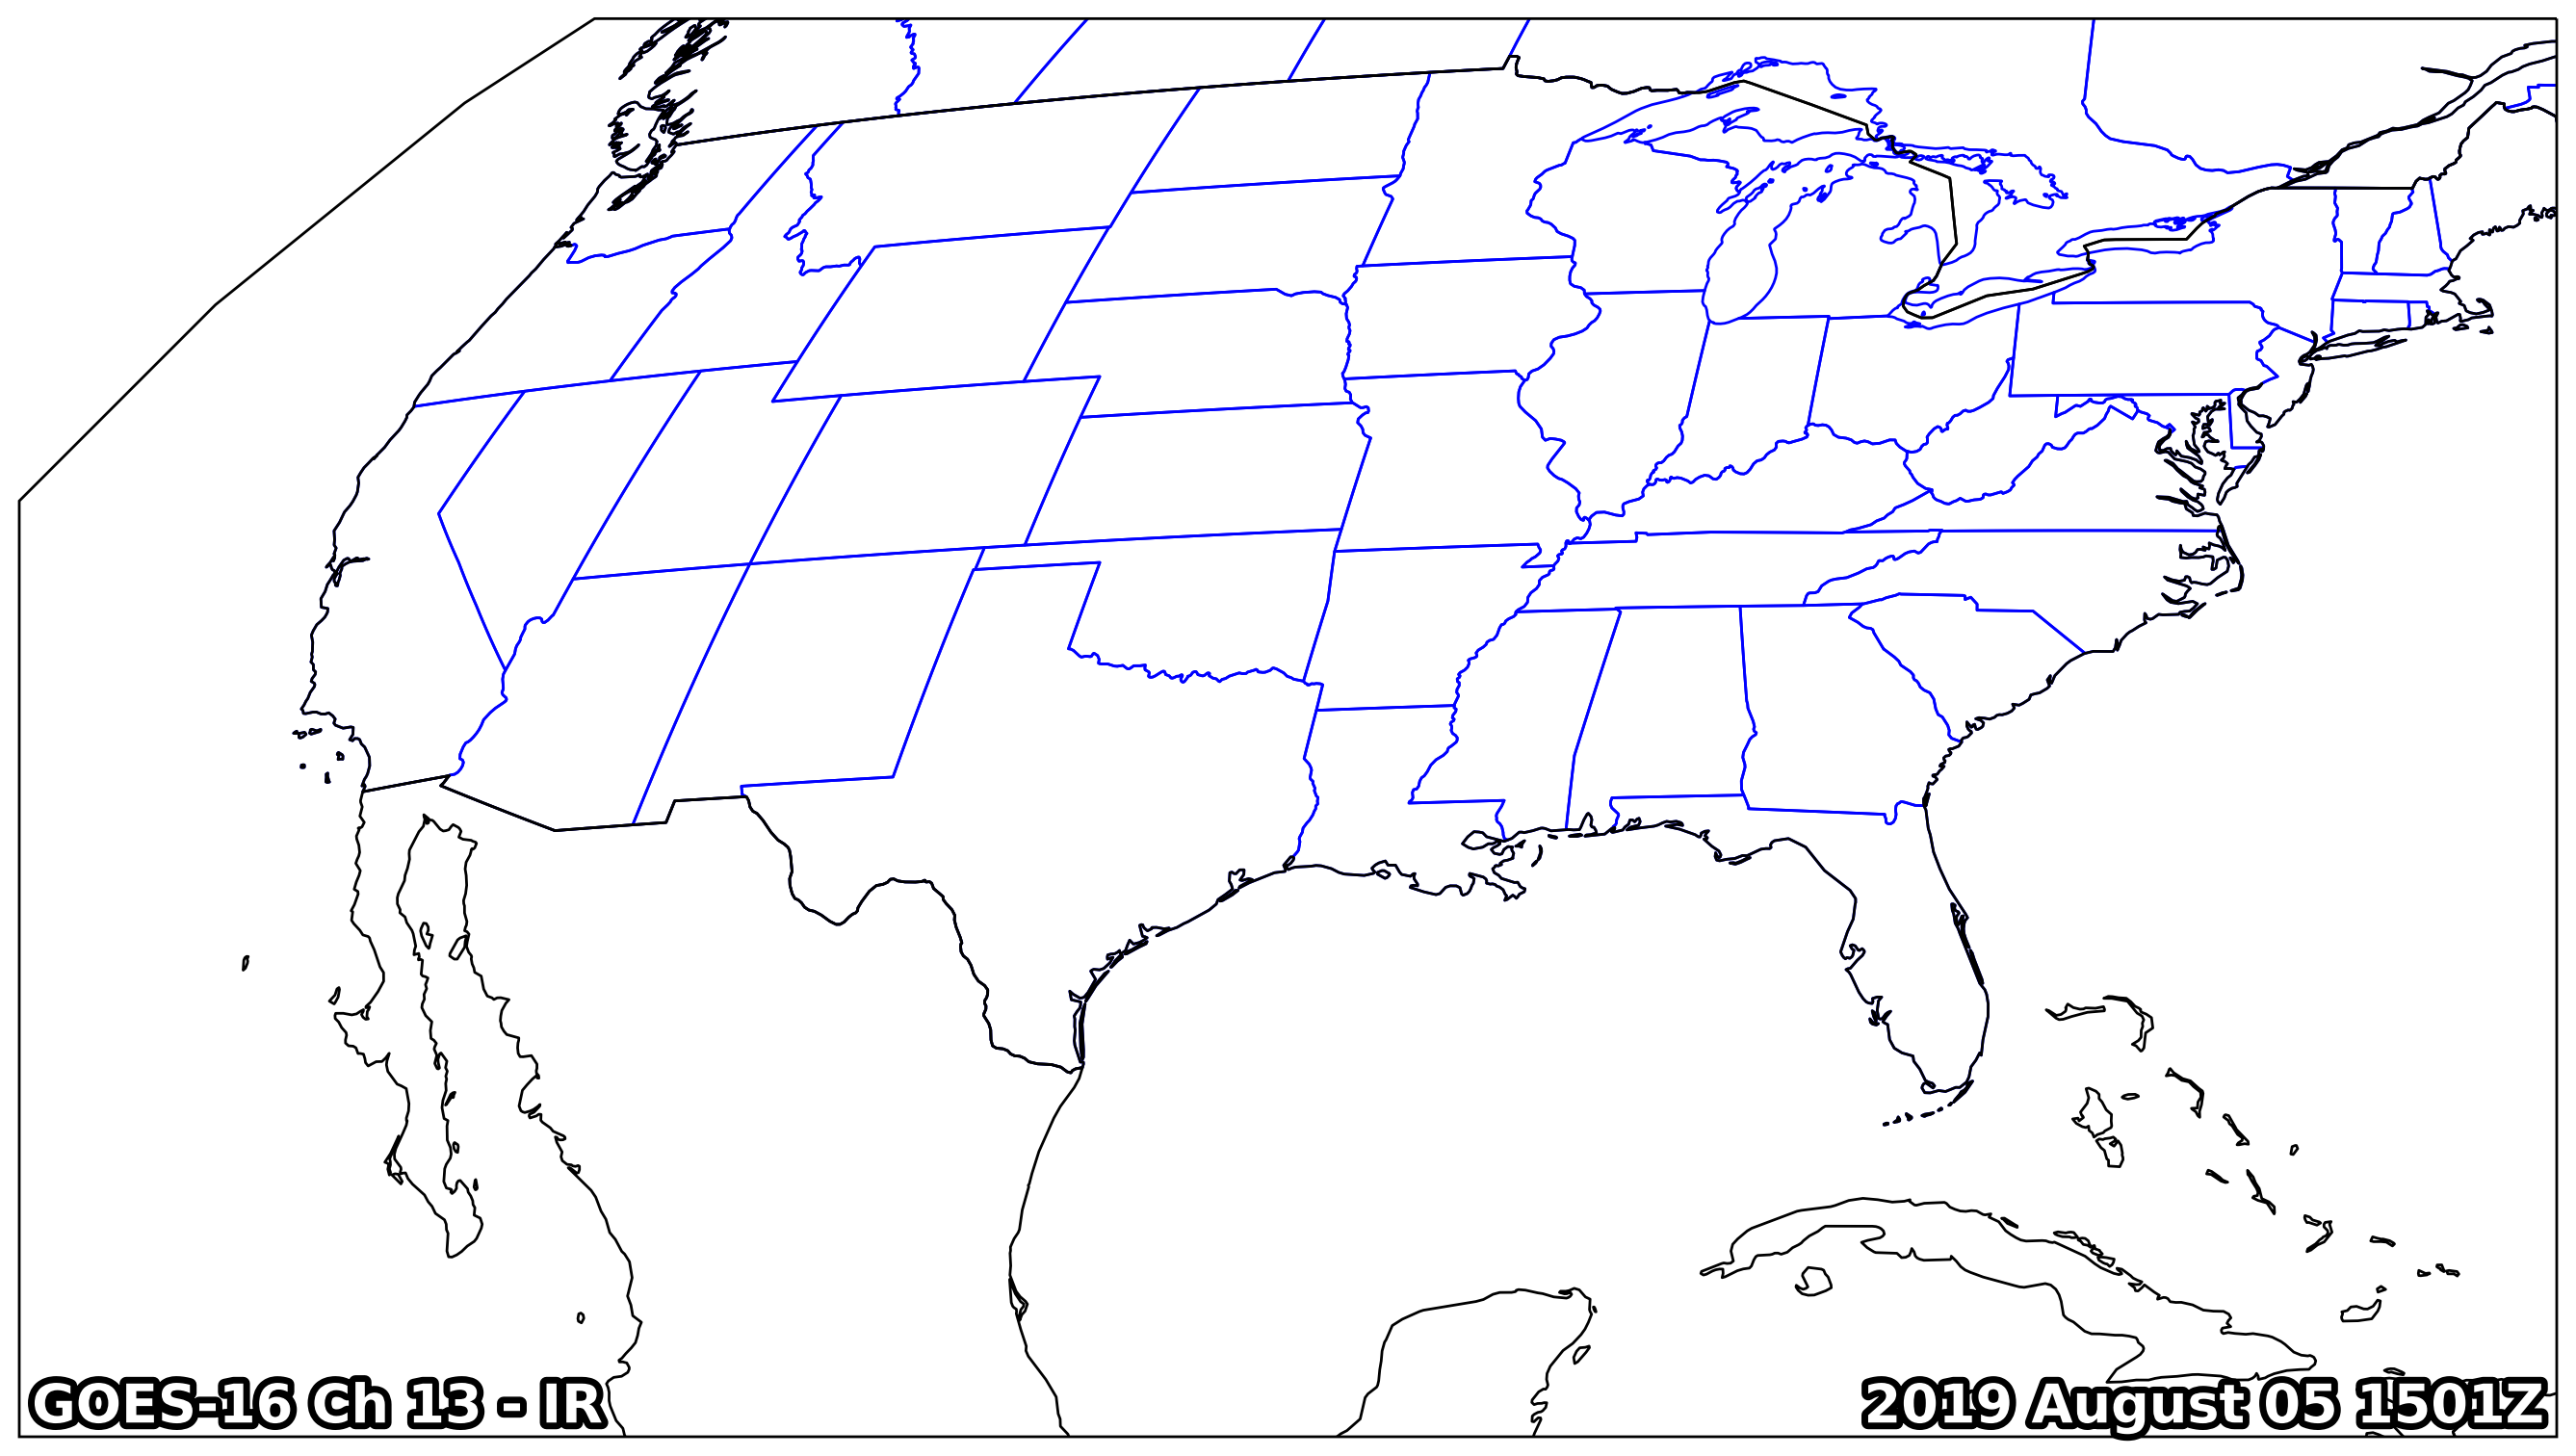

In [43]:
ch13nc = Dataset(GOES16_samples_13[0])
vis_name = GOES16_samples_13[0][-76:]
data_IR = ch13nc.variables['Rad'][:]
        #ch2nc.close()
        #ch2nc = None

fk1 = ch13nc.variables['planck_fk1'][0]
fk2 = ch13nc.variables['planck_fk2'][0]
bc1 = ch13nc.variables['planck_bc1'][0]
bc2 = ch13nc.variables['planck_bc2'][0]

data_IR = (fk2 / ( np.log((fk1 / data_IR) + 1 )) - bc1) / bc2


# Find and convert Julian day to date    
import datetime as DT
dt2 = datetime(2019,1,1)
dtdelta = DT.timedelta(days=int(vis_name[31:34])-1)
Day = dt2 + dtdelta
    
title = "GOES-"+vis_name[23:25]+" Ch 13 - IR"
title_date = vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z"
im_file = vis_name[27:31]+"_"+'{0:%m_%d}'.format(Day)+"_"+vis_name[34:36]+vis_name[36:38]
    
print(ch13nc)    
sat_h = ch13nc.variables['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = nc.variables['goes_imager_projection'].longitude_of_projection_origin

# Satellite sweep
#sat_sweep = nc.variables['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = ch13nc.variables['x'][:] * sat_h
Y = ch13nc.variables['y'][:] * sat_h

# Set the projections for plotting 
proj_var = ch13nc.variables['goes_imager_projection']
sat_height = proj_var.perspective_point_height
central_lon = proj_var.longitude_of_projection_origin
semi_major = proj_var.semi_major_axis
semi_minor = proj_var.semi_minor_axis

# Create a new fig
fig = plt.figure(figsize=(17., 11.), dpi=200)

# Add state and country boundaries to plot
states_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_0_countries',scale='50m', facecolor='none')

# Set Projection of Plot
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height)#, globe=globe

#plotcrs = ccrs.LambertConformal(central_latitude=[30, 60], central_longitude=-100)
plotcrs = ccrs.LambertConformal()


# Add the map and set the extent
ax = plt.subplot(111, projection=crs) 

# Set the plot title    
#plt.title(title,loc='left',fontdict=font)
#plt.title(title_date,loc='right',fontdict=font)


text_time = ax.text(.995, 0.01, 
        vis_name[27:31]+" "+'{0:%B %d}'.format(Day)+" "+vis_name[34:36]+""+vis_name[36:38]+"Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

text_time2 = ax.text(0.005, 0.01, 
        title,
        horizontalalignment='left', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)
text_time2.set_path_effects(outline_effect)

# Add state boundaries to plot
ax.add_feature(states_boundaries, edgecolor='blue', linewidth=1)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1)

#ax.set_extent([-110., -98, 36., 42.])
#ax.set_extent([-130., -70, 20., 60.], ccrs.PlateCarree()) # CONUS
#ax.set_extent(extent, ccrs.PlateCarree()) # Eastern Pacific
#ax.set_extent([-105, -98, 30, 50])
#ax.set_extent([-70, -98, 20, 35])
ax.set_extent(extent) # Eastern Pacific
#ax.gridlines(color="w", linestyle="dotted",alpha=0.5)

reader = shpreader.Reader('/Users/chowdahead/Downloads/day1otlk_20190805_1300-shp/day1otlk_20190805_1300_cat.shp')
Roads = list(reader.geometries())
print(Roads)
ROADS = cfeature.ShapelyFeature(Roads,ccrs.PlateCarree())
ax.add_feature(ROADS, facecolor='none',edgecolor='red',linestyle='--',linewidth=10,zorder=15)



#im = plt.imshow(data_IR[:],origin='upper',extent=(X.min(), X.max(), Y.min(), Y.max()),
#                interpolation='nearest',vmin=162.,vmax=330.,cmap=IR_cmap.IR_Colormap(), transform=crs) #,vmin=vmin,vmax=vmax

#im = plt.imshow(data_IR[:],origin='upper',extent=(-3626269.5,1381769.9,1584175.8,4588198.0),
#                interpolation='nearest',vmin=162.,vmax=330.,cmap=IR_cmap,transform=ccrs.Geostationary())

plt.show()
outfile = "GOES"+vis_name[23:25]+"_Ch13_"+str(im_file)+".png"
fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)
#plt.close(fig)

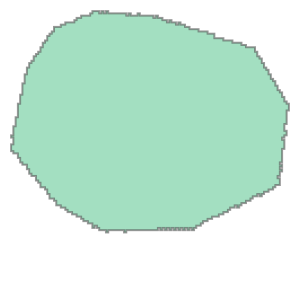

In [32]:
reader = shpreader.Reader('/Users/chowdahead/Downloads/day1otlk_20190805_1300-shp/day1otlk_20190805_1300_cat.shp')
#Roads = list(reader.geometries())
list(reader.geometries())[2]

In [41]:
import shapefile
reader= shapefile.Reader('/Users/chowdahead/Downloads/day1otlk_20190805_1300-shp/day1otlk_20190805_1300_cat.shp')
# schema of the shapefile
print(dict((d[0],d[1:]) for d in reader.fields[1:]))
{'DIP_DIR': ['N', 3, 0], 'DIP': ['N', 2, 0], 'TYPE': ['C', 10, 0]}
fields = [field[0] for field in reader.fields[1:]]
for feature in reader.shapeRecords():
    print(fields)
    geom = feature.shape.__geo_interface__
    atr = dict(zip(fields, feature.record))
    print(atr)
print(geom)

{'DN': ['N', 10, 0], 'VALID': ['C', 12, 0], 'EXPIRE': ['C', 12, 0]}
['DN', 'VALID', 'EXPIRE']
{'DN': 2, 'VALID': '201908051300', 'EXPIRE': '201908061200'}
['DN', 'VALID', 'EXPIRE']
{'DN': 4, 'VALID': '201908051300', 'EXPIRE': '201908061200'}
['DN', 'VALID', 'EXPIRE']
{'DN': 5, 'VALID': '201908051300', 'EXPIRE': '201908061200'}
['DN', 'VALID', 'EXPIRE']
{'DN': 4, 'VALID': '201908051300', 'EXPIRE': '201908061200'}
['DN', 'VALID', 'EXPIRE']
{'DN': 3, 'VALID': '201908051300', 'EXPIRE': '201908061200'}
['DN', 'VALID', 'EXPIRE']
{'DN': 2, 'VALID': '201908051300', 'EXPIRE': '201908061200'}
{'type': 'Polygon', 'coordinates': (((-6857302.027154815, 10352198.415135758), (-6852378.603319914, 10352198.415135758), (-6852378.603319914, 10347274.991300857), (-6847455.179485013, 10347274.991300857), (-6847455.179485013, 10352198.415135758), (-6842531.7556501115, 10352198.415135758), (-6842531.7556501115, 10347274.991300857), (-6832684.90798031, 10347274.991300857), (-6832684.90798031, 10342351.5674659

/Users/chowdahead/miniconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


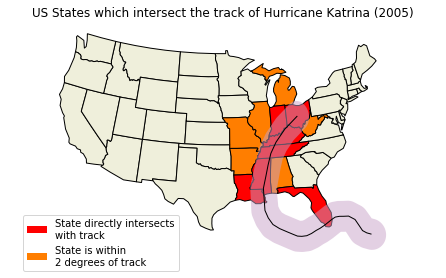

In [42]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    http://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats


def main():
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        if geometry.intersects(track):
            facecolor = 'red'
        elif geometry.intersects(track_buffer):
            facecolor = '#FF7E00'
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    ax.legend([direct_hit, within_2_deg], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()


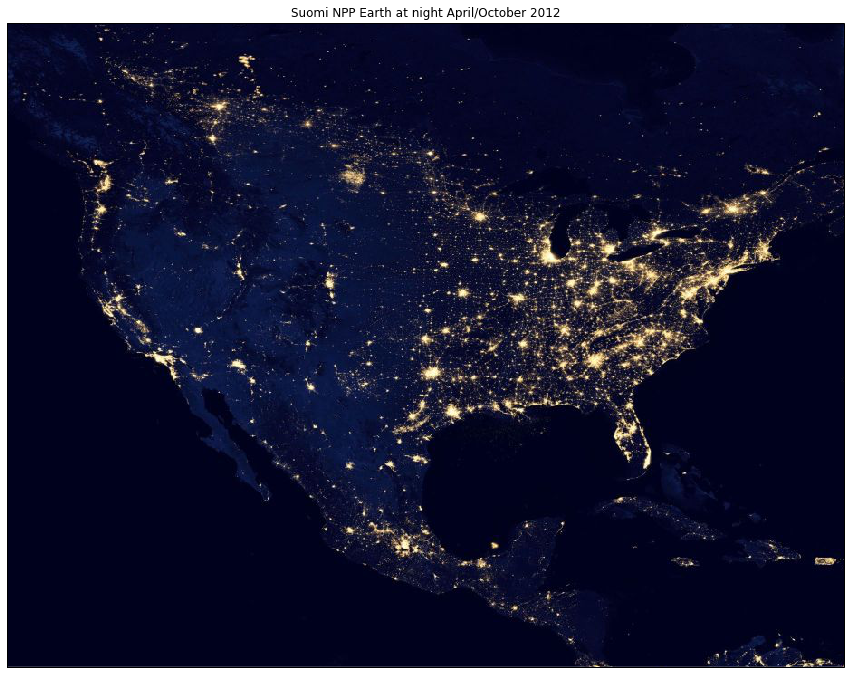

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def main():
    url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
    layer = 'VIIRS_CityLights_2012'

    fig = plt.figure(figsize=(15,17))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.add_wmts(url, layer)
    ax.set_extent([-130, -65, 10, 60], crs=ccrs.PlateCarree())

    ax.set_title('Suomi NPP Earth at night April/October 2012')
    plt.show()


if __name__ == '__main__':
    main()